In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**3. Here we explore the maximal margin classifier on a toy data set.
(a) We are given n = 7 observations in p = 2 dimensions. For each
observation, there is an associated class label.Sketch the observations.**

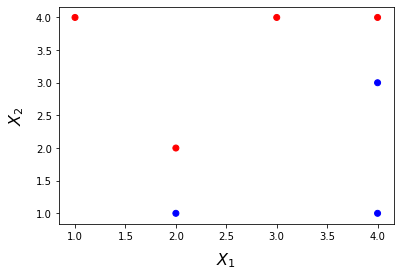

In [2]:
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
y = np.array(['Red','Red','Red','Red','Blue','Blue','Blue'])
plt.scatter(X[:,0],X[:,1],color = y)
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)
plt.show()

**(b) Sketch the optimal separating hyperplane, and provide the equa-
tion for this hyperplane (of the form (9.1)).
(c) Describe the classification rule for the maximal margin classifier.
It should be something along the lines of “Classify to Red if
β 0 +β 1 X 1 +β 2 X 2 > 0, and classify to Blue otherwise.” Provide
the values for β 0 , β 1 , and β 2 .**

In [3]:
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
#使用一个函数，将某个可迭代对象中的对象转化为颜色对象便于作图，不能超过7类颜色
def plot_svc(svc, X, y, h=0.02, pad=0.25,figsize = (8,6)):
    color_list = ['red','blue','green','black','yellow','brown','peru']
    cmap = ListedColormap(color_list[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    levels = MaxNLocator(nbins=len(svc.classes_)).tick_values(Z.min(), Z.max())
    plt.figure(figsize = figsize)
    cs = plt.contourf(xx, yy, Z,alpha=0.25, cmap=cmap,levels = levels)
    cb = plt.colorbar(cs)
    cb.set_ticks(svc.classes_)
    #plt.scatter(X[:,0], X[:,1], s=120, edgecolors = element_to_color(y), marker = 'o',color = '')
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], s=120,
                    marker = 'o',color = '',edgecolors = cmap(idx))
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c = 'k', marker='x', s=50, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_1$')
    #plt.show()
    print('Number of support vectors: ', svc.support_.size)

Number of support vectors:  3


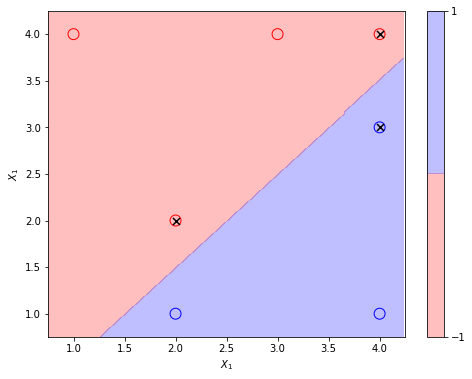

In [4]:
from sklearn.svm import SVC
y = np.concatenate([np.repeat(-1, 4), np.repeat(1,3)])
svm = SVC(kernel="linear", C = float("inf"))
svm.fit(X,y)
plot_svc(svm, X, y)

In [5]:
w = svm.coef_[0]
b = svm.intercept_[0]
print('belta_0:',b)
print('belta_1:',w[0])
print('belta_2:',w[1])

belta_0: -1.0004096000000027
belta_1: 1.9998464000000027
belta_2: -1.9996928000000018


**(d) On your sketch, indicate the margin for the maximal margin
hyperplane.**

Number of support vectors:  3


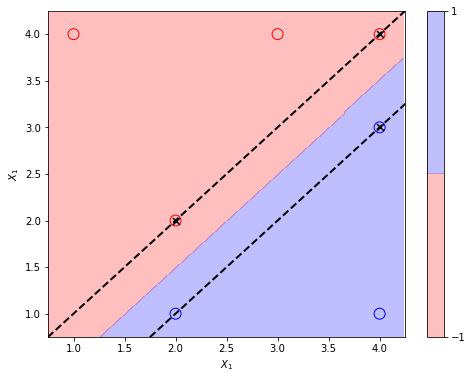

In [6]:
plot_svc(svm, X, y)
x0 = np.linspace(-2, 5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)

**(e) Indicate the support vectors for the maximal margin classifier.**

In [7]:
svm.support_vectors_

array([[2., 2.],
       [4., 4.],
       [4., 3.]])

**(f) Argue that a slight movement of the seventh observation would
not affect the maximal margin hyperplane.**

Number of support vectors:  3


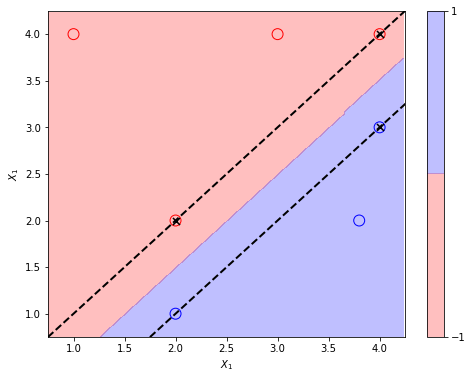

In [8]:
X_7sm = X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[3.8,2]])
svm_7sm = SVC(kernel="linear", C = float("inf"))
svm_7sm.fit(X_7sm,y)
plot_svc(svm_7sm, X_7sm, y)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)

可见第7个点的变化并未引起什么变化

**(g) Sketch a hyperplane that is not the optimal separating hyper-
plane, and provide the equation for this hyperplane.**

0.8−X1+X2>0

Number of support vectors:  3


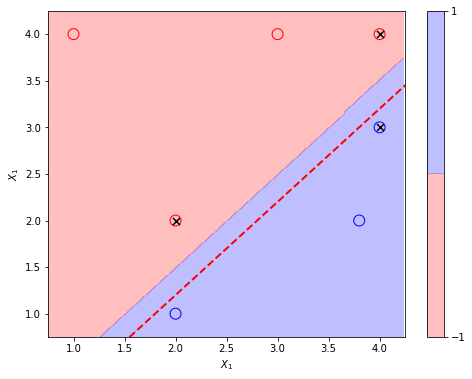

In [9]:
plot_svc(svm, X, y)
plt.plot(x0, x0 - 0.8, "r--", linewidth=2)

**(h) Draw an additional observation on the plot so that the two
classes are no longer separable by a hyperplane.**

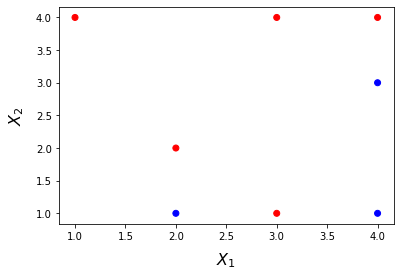

In [10]:
X_add = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1],[3,1]])
y_add = np.array(['Red','Red','Red','Red','Blue','Blue','Blue','Red'])
plt.scatter(X_add[:,0],X_add[:,1],color = y_add)
plt.xlabel('$X_1$',fontsize = 16,labelpad =10)
plt.ylabel('$X_2$',fontsize = 16,labelpad =10)
plt.show()

Number of support vectors:  6


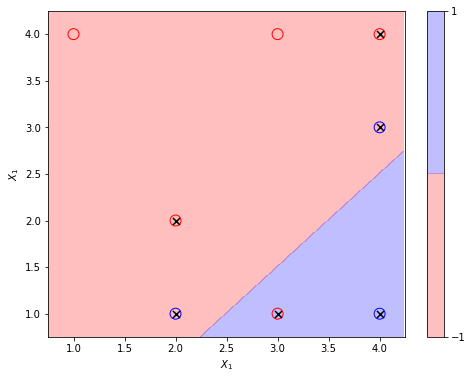

In [11]:
svm_add = SVC(kernel="linear", C = 1 * 10**5)
y_add = np.concatenate([np.repeat(-1, 4), np.repeat(1,3), np.repeat(-1,1)])
svm_add.fit(X_add,y_add)
plot_svc(svm_add, X_add, y_add)